# Worksheet 21

Name:  Priscilla Nguyen \
UID: U83582329

### Topics

- Logistic Regression

## Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

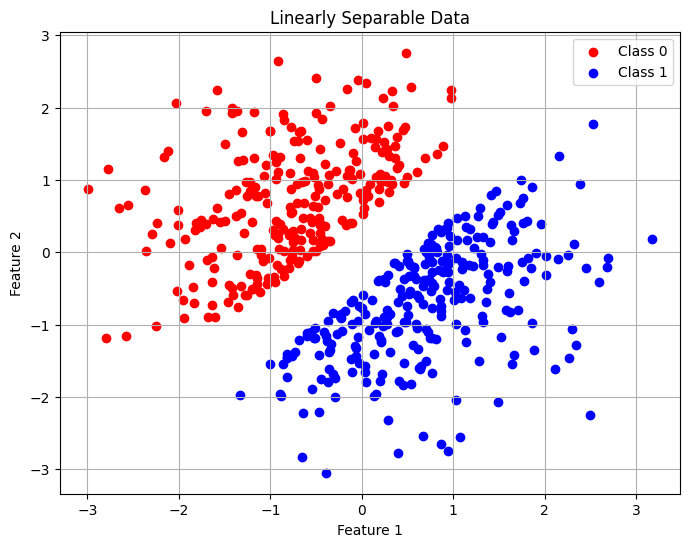

In [2]:
X, Y = generate_line_data()

plt.figure(figsize=(8, 6))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='blue', label='Class 1')
plt.title('Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

b) Fit a logistic regression model to the data a print out the coefficients.

In [3]:
model = LogisticRegression().fit(X, Y)
coefficients = model.coef_
intercept = model.intercept_

coefficients, intercept

(array([[ 4.11337993, -4.10105513]]), array([0.05839469]))

c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

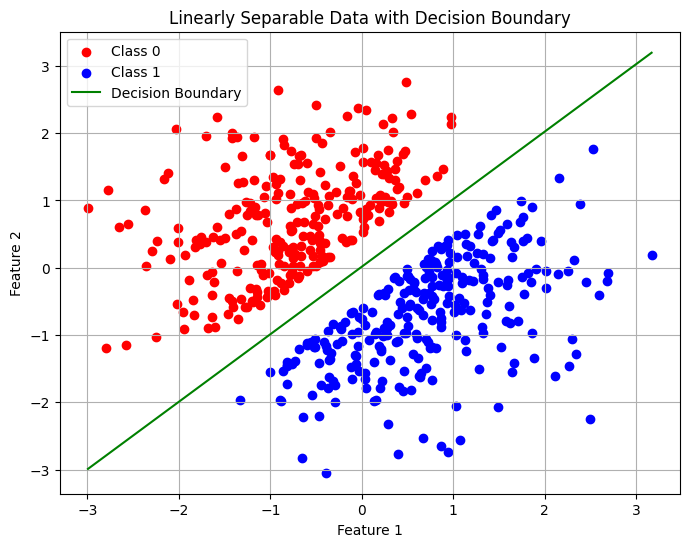

In [4]:
slope = -coefficients[0][0] / coefficients[0][1]
intercept_line = -intercept / coefficients[0][1]

x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

y_values = slope * x_values + intercept_line

plt.figure(figsize=(8, 6))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='blue', label='Class 1')
plt.plot(x_values, y_values, color='green', label='Decision Boundary')
plt.title('Linearly Separable Data with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

d) Using the above code, generate and plot the CIRCLE data.

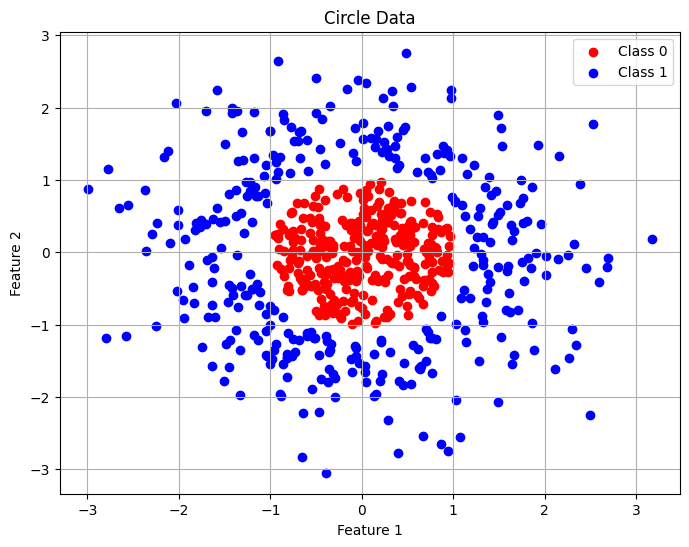

In [5]:
t, _ = datasets.make_blobs(n_samples=750, centers=[[0, 0]], cluster_std=1, random_state=0)
X_circle, Y_circle = generate_circle_data(t)

plt.figure(figsize=(8, 6))
plt.scatter(X_circle[Y_circle == 0][:, 0], X_circle[Y_circle == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_circle[Y_circle == 1][:, 0], X_circle[Y_circle == 1][:, 1], color='blue', label='Class 1')
plt.title('Circle Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

In [6]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_circle)

# Fit the logistic regression model
model_circle_poly = LogisticRegression().fit(X_poly, Y_circle)

f) Plot the decision boundary using the code below.

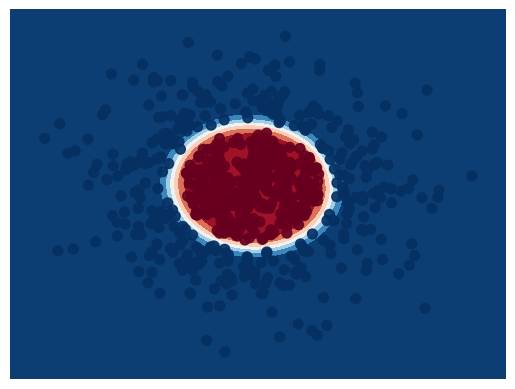

In [7]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_circle)

# Fit the logistic regression model
model_circle_poly = LogisticRegression().fit(X_poly, Y_circle)

# Create a mesh to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_circle[:, 0].min() - .5, X_circle[:, 0].max() + .5
y_min, y_max = X_circle[:, 1].min() - .5, X_circle[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

# Transform mesh data
meshData_poly = poly.transform(meshData)

# Predictions for the mesh data
A = model_circle_poly.predict_proba(meshData_poly)[:, 1].reshape(xx.shape)

# Plotting
fig, ax = plt.subplots()
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')
ax.scatter(X_circle[:, 0], X_circle[:, 1], c=Y_circle, s=50, alpha=0.9, cmap='RdBu')
plt.show()

g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

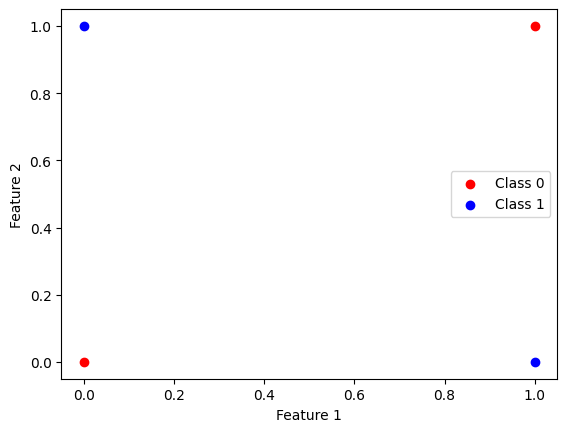

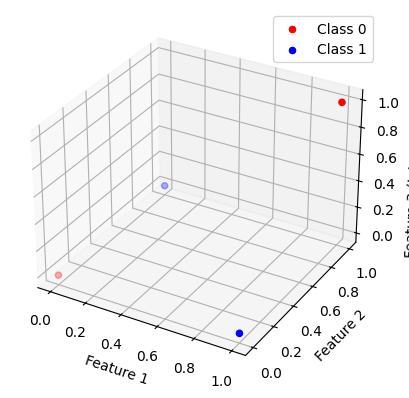

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Generate XOR data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_xor = np.array([x[0] ^ x[1] for x in X_xor])

# Plot 2D XOR data
plt.scatter(X_xor[Y_xor == 0][:, 0], X_xor[Y_xor == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_xor[Y_xor == 1][:, 0], X_xor[Y_xor == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Create interaction term and plot 3D XOR data
X_xor_3d = np.hstack((X_xor, (X_xor[:, 0] * X_xor[:, 1]).reshape(-1, 1)))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_xor_3d[Y_xor == 0][:, 0], X_xor_3d[Y_xor == 0][:, 1], X_xor_3d[Y_xor == 0][:, 2], color='red', label='Class 0')
ax.scatter(X_xor_3d[Y_xor == 1][:, 0], X_xor_3d[Y_xor == 1][:, 1], X_xor_3d[Y_xor == 1][:, 2], color='blue', label='Class 1')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3 (Interaction Term)')
ax.legend()
plt.show()

h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

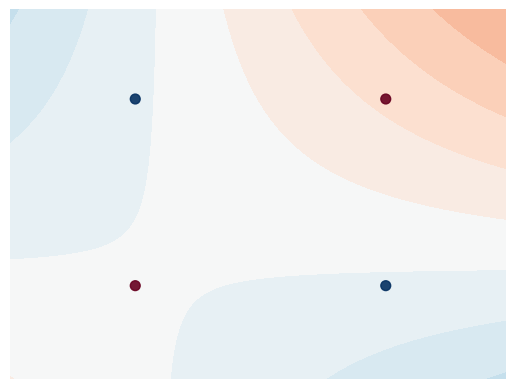

In [9]:
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_xor = np.array([x[0] ^ x[1] for x in X_xor])

# Apply a logistic regression model using the interaction term
poly = PolynomialFeatures(interaction_only=True)
lr = LogisticRegression(verbose=0)
model = make_pipeline(poly, lr).fit(X_xor, Y_xor)

# Create a mesh to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_xor[:, 0].min() - .5, X_xor[:, 0].max() + .5
y_min, y_max = X_xor[:, 1].min() - .5, X_xor[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

# Use the pipeline to predict probabilities for the mesh data
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)

# Plotting
fig, ax = plt.subplots()
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')
ax.scatter(X_xor[:, 0], X_xor[:, 1], c=Y_xor, s=50, alpha=0.9, cmap='RdBu')
plt.show()

1.0
random state =  0
solver =  lbfgs
1.0
random state =  1
solver =  lbfgs
1.0
random state =  2
solver =  lbfgs
1.0
random state =  3
solver =  lbfgs
1.0
random state =  4
solver =  lbfgs
1.0
random state =  5
solver =  lbfgs
1.0
random state =  6
solver =  lbfgs
1.0
random state =  7
solver =  lbfgs
1.0
random state =  8
solver =  lbfgs
1.0
random state =  9
solver =  lbfgs
1.0
random state =  10
solver =  lbfgs
1.0
random state =  11
solver =  lbfgs
1.0
random state =  12
solver =  lbfgs
1.0
random state =  13
solver =  lbfgs
1.0
random state =  14
solver =  lbfgs
1.0
random state =  15
solver =  lbfgs
1.0
random state =  16
solver =  lbfgs
1.0
random state =  17
solver =  lbfgs
1.0
random state =  18
solver =  lbfgs
1.0
random state =  19
solver =  lbfgs
1.0
random state =  20
solver =  lbfgs
1.0
random state =  21
solver =  lbfgs
1.0
random state =  22
solver =  lbfgs
1.0
random state =  23
solver =  lbfgs
1.0
random state =  24
solver =  lbfgs
1.0
random state =  25
solver =  lb

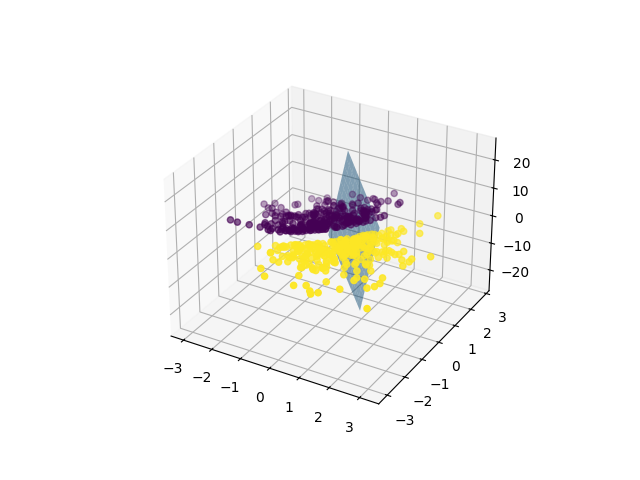

In [10]:
%matplotlib widget
for i in range(20000):
    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
        X_transform = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(X)
        model = LogisticRegression(verbose=0, solver=solver, random_state=i, max_iter=10000)
        model.fit(X_transform, Y)
        print(model.score(X_transform, Y))
        if model.score(X_transform, Y) > .75:
            print("random state = ", i)
            print("solver = ", solver)
            break

print(model.coef_)
print(model.intercept_)

xx, yy = np.meshgrid([x / 10 for x in range(-1, 11)], [x / 10 for x in range(-1, 11)])
z = - model.intercept_ / model.coef_[0][2] - model.coef_[0][0] * xx / model.coef_[0][2] - model.coef_[0][1] * yy / model.coef_[0][2]

ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
ax.plot_surface(xx, yy, z, alpha=0.5)
plt.show()

i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54575D+03    |proj g|=  2.20592D+03

At iterate    1    f=  1.25980D+03    |proj g|=  7.85645D+02

At iterate    2    f=  1.16386D+03    |proj g|=  4.67390D+02

At iterate    3    f=  1.12014D+03    |proj g|=  8.53618D+02

At iterate    4    f=  1.07857D+03    |proj g|=  2.28644D+02

At iterate    5    f=  1.03868D+03    |proj g|=  2.46093D+02

At iterate    6    f=  8.75292D+02    |proj g|=  2.23884D+02

At iterate    7    f=  6.72984D+02    |proj g|=  1.69393D+02

At iterate    8    f=  4.06106D+02    |proj g|=  3.22571D+02

At iterate    9    f=  3.84632D+02    |proj g|=  4.67515D+02

At iterate   10    f=  2.26564D+02    |proj g|=  2.61932D+02

At iterate   11    f=  1.84398D+02    |proj g|=  1.15386D+02

At iterate   12    f=  1.54569D+02    |proj g|=  6.06745D+01

At iterate   13    f=  1.3

 This problem is unconstrained.
/Users/priscilla-nguyen/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


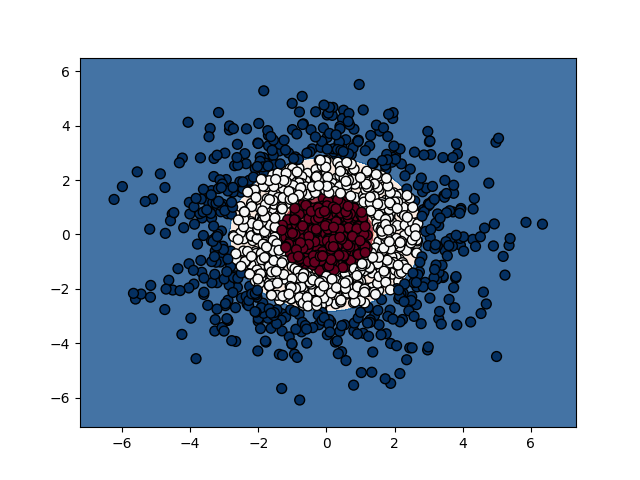

In [11]:
# Generate data for three concentric circles
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2, random_state=0)

# Function to generate circle data
def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0
    X = np.array(list(filter(lambda x: (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

X, Y = generate_circles_data(t)

# Fit a logistic regression model with polynomial features
poly = PolynomialFeatures(2)
lr = LogisticRegression(verbose=2)
model = make_pipeline(poly, lr).fit(X, Y)

# Create a mesh to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

# Use the pipeline to predict probabilities for the mesh data
A = model.predict(meshData).reshape(xx.shape)

# Plotting
fig, ax = plt.subplots()
ax.contourf(xx, yy, A, cmap="RdBu", alpha=0.8)
ax.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='RdBu', edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
plt.show()